Regressió Lineal Simple
===================

***

En aquest apartat veurem un exemple senzill d'ús de la regressió lineal simple.
L'exemple es contextualitzarà en un **data set** que conté el **salari** d'una sèrie de treballadors d'una empresa juntament amb els **anys d'experiència** que té cadascun d'ells.
El que volem veure és si podem relacionar de forma lineal les dues variables: el salari i els anys d'experiència de l'empleat.

## Importem les llibreries

In [1]:
# Importar llibreries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importem les dades del data set

In [3]:
# Importar el data set
dataset = pd.read_csv('dataset/Salary_Data.csv')

dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
#seleccionem totes les columnes excepte la última
x=dataset.iloc[:, :-1].values # els anys a l'empresa

#seleccionem només la primera columna.
y=dataset.iloc[:, 1].values # salari


## Dibuixem un gràfic de dispesió - scatter plot

Amb aquest gràfic ja veiem que hi ha certa correlació entre les dues variables.

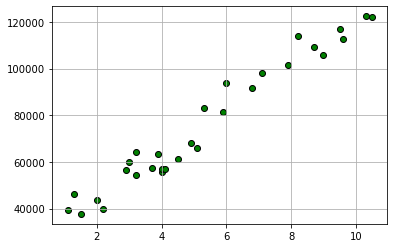

In [6]:
plt.scatter(x,y,c='green',edgecolors='k')
plt.grid(True)
plt.show()

## Dividim el data set en conjunt d'entrenament i conjunt de testing

En aquest cas no farem un 80% 20% perquè és un cas molt senzill a non només tenim 30 observacions. Reservarem 2/3 per l'entrenament i 1/3 per el testing

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)


## Creem el model de Regessió lineal simple

In [4]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(x_train, y_train)


LinearRegression()

## Predim el conjunt de test

In [5]:
y_pred = regression.predict(x_test)
print(y_pred)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


## Visualitzem el resultat de l'entrenament

Fixem-nos amb el següent gràfic a on tenim la dispersió dels punts d'entrenament (x_train, y_train) i la recta utilitzant les prediccions de Y a través del conjunt d'entrenament.

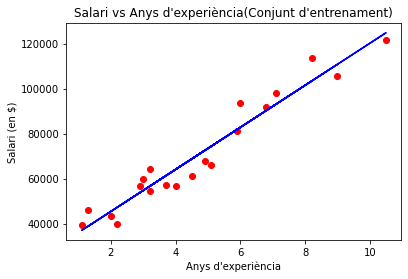

In [10]:
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, regression.predict(x_train), color = "blue")
plt.title("Salari vs Anys d'experiència(Conjunt d'entrenament)")
plt.xlabel("Anys d'experiència")
plt.ylabel("Salari (en $)")
plt.show()

## Visualitzem el resultat del test

En aquest gràfic tenim la mateixa recta que la d'entrenament i ara la comparem amb els punts de dispersió dels de test.
Veiem que la recta s'ajusta força bé en els punts de test. Fins i tot alguns passen per sobre.

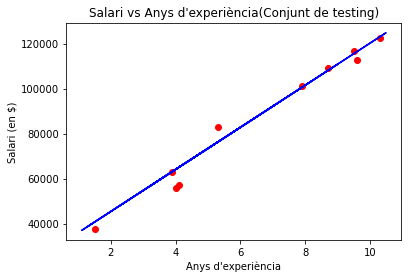

In [11]:
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_train, regression.predict(x_train), color = "blue")
plt.title("Salari vs Anys d'experiència(Conjunt de testing)")
plt.xlabel("Anys d'experiència")
plt.ylabel("Salari (en $)")
plt.show()

## Avaluem el model

Per avaluar el model utilitzarem les mètriques que ens proporciona ScikitLearn

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Mostrem els coeficents obtinguts:
print('Coeficient \u03B21: %.3f' % regression.coef_)

# Valor del temre independent (X=0)
print('Terme independent \u03B20: %.3f' % regression.intercept_)

print("Coeficiente de determinación R^2:", regression.score(x, y))

# Error Quadràtic Mig
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))

print("RMSE: %.2f" % mean_squared_error(y_test, y_pred,squared=False))

# R-quadrat 
print('R-quadrat: %.2f' % r2_score(y_test, y_pred))

Coeficient β1: 9345.942
Terme independent β0: 26816.192
Coeficiente de determinación R^2: 0.9565349708076958
MSE: 21026037.33
RMSE: 4585.42
R-quadrat: 0.97
R-quadrat: 0.94


In [9]:
regression.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'